**Group : 3**

**Cocoma, David**

**Picard, Christophe**

### 1. Choix du dataset - Student Alcohol Consumption

Nous avons utilisé un ensemble de données recueilli dans le cadre d’une enquête menée auprès d’élèves inscrits aux cours de mathématiques et de portugais dans l’enseignement secondaire. Ce dataset contient de nombreuses informations sociales, familiales, académiques et personnelles concernant les étudiants, comme leur situation familiale, leurs habitudes d’étude, leur réussite scolaire, ainsi que des variables liées à leur comportement.

Nous avons choisi ce dataset parce qu’il offre une richesse de variables permettant d’explorer plusieurs aspects de la vie des étudiants. Plus particulièrement, nous l’avons trouvé intéressant pour prédire le niveau de consommation d’alcool, car ce dernier peut être influencé par des facteurs sociaux, familiaux et scolaires. Ainsi, nous avons sélectionné la variable correspondant au niveau de consommation d’alcool comme variable cible, et utilisé toutes les autres caractéristiques du dataset comme variables explicatives.

1.1 Prétraitement de votre dataset

In [13]:
import pandas as pd

#Importation de la database
AI_db = pd.read_csv("student-mat.csv")

#Affichage des 5 premières lignes de la base de données
AI_db.head()
AI_db.count

<bound method DataFrame.count of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fr

**Exploration**

- Combien d'exemples ?

Il y a 395 exemples.

- Quelles sont les features ? Combien ?

Il y a 33 features, les voici :

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male
3. age - student's age (numeric: from 15 to 22
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

- Quels sont les labels ? Regardez la distribution, est-ce qu'ils sont équilibrés ?

Le label choisi est Walc correspondant à la consommation d'alcool lors des weekend.
Il est catégorisé comme suit : de 1 - très bas à 5 - très haut). Les données sont assez équilibrées mise à part une plus importante quantité pour 1 et une plus petite pour 5 comparé à la moyenne.

- Est-ce qu'il y a une grande variété de données ?

Les données sont variées du fait du nombre de valeurs possibles dans chaque feature. Pour exemple, les parents ne sont pas tous catégorisés dans le même domaine, donc il y a ici déjà une grande variété de classe sociale.
  

**Normalisation**

N'oubliez pas de systématiquement normaliser vos données: https://scikit-learn.org/stable/modules/preprocessing.html

Nous utilisons le MinMaxScaler car il met toutes les variables sur une même échelle entre 0 et 1, ce qui est particulièrement adapté lorsque le dataset contient des variables binaires et ordinales. Contrairement au StandardScaler, il ne déforme pas les variables 0/1 et conserve la structure des données tout en évitant que certaines caractéristiques dominent les distances lors du clustering

Comme nous avons des valeurs ordinales comprises entre 0 et 5 ainsi que des variables binaires, une normalisation standard n’est pas appropriée, elle transformerait les données binaires en valeurs continues, ce qui ferait perdre leur sens catégoriel et ne représenterait plus correctement les caractéristiques d’origine.

In [24]:
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

encoders = {}

categorical_cols = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'Mjob', 'Fjob', 'reason', 'guardian',
    'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic'
]

# Encode categorical variables
for col in categorical_cols:
    le = LabelEncoder()
    AI_db[col] = le.fit_transform(AI_db[col])
    encoders[col] = le  

# Convert to numpy
X_train = AI_db.drop(columns=['Walc']).to_numpy()  # All features
Y_train = AI_db['Walc'].to_numpy()

# --- MinMaxScaler ---
scaler = MinMaxScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

# Create mapping for encoded categories
mapping = {}
for col, le in encoders.items():
    mapping[col] = {i: cls for i, cls in enumerate(le.classes_)}

mapping

{'school': {0: 0, 1: 1},
 'sex': {0: 0, 1: 1},
 'address': {0: 0, 1: 1},
 'famsize': {0: 0, 1: 1},
 'Pstatus': {0: 0, 1: 1},
 'Mjob': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'Fjob': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4},
 'reason': {0: 0, 1: 1, 2: 2, 3: 3},
 'guardian': {0: 0, 1: 1, 2: 2},
 'schoolsup': {0: 0, 1: 1},
 'famsup': {0: 0, 1: 1},
 'paid': {0: 0, 1: 1},
 'activities': {0: 0, 1: 1},
 'nursery': {0: 0, 1: 1},
 'higher': {0: 0, 1: 1},
 'internet': {0: 0, 1: 1},
 'romantic': {0: 0, 1: 1}}

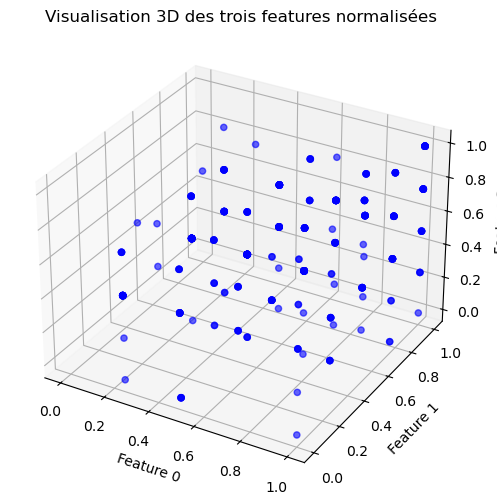

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff

f0 = X_scaled[:,7]# tous  les  elements  de la colonne 7
f1 = X_scaled[:,8]# tous  les  elements  de la colonne 8
f2 = X_scaled[:,9]# tous  les  elements  de la colonne 9

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(f0, f1, f2, c='blue', s=20, alpha=0.6)

# Labels
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
ax.set_title('Visualisation 3D des trois features normalisées')

plt.show()


Appel KMeans pour une valeur fixée de k


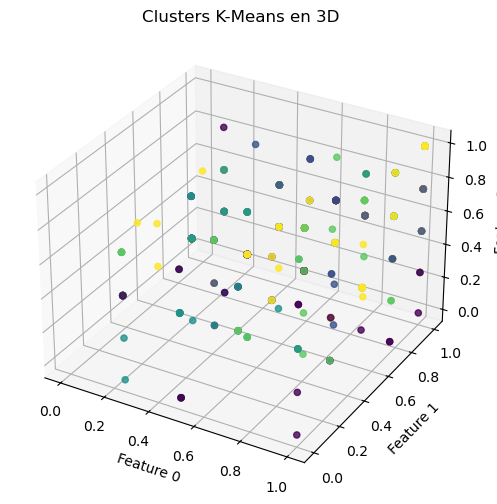

nb clusters = 5 , nb iter = 16 , runtime = 5.33 ms


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import time

# --- Definir datanp correctamente ---
datanp = X_scaled   # dataset entero para clustering

print("Appel KMeans pour une valeur fixée de k")
tps1 = time.time()
k = 5

model = cluster.KMeans(n_clusters=k, init="k-means++", n_init="auto")
model.fit(datanp)

tps2 = time.time()

labels = model.labels_
iteration = model.n_iter_

# --- Plot 3D des clusters ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(f0, f1, f2, c=labels, cmap='viridis', s=20, alpha=0.8)

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
ax.set_title('Clusters K-Means en 3D')

plt.show()

print("nb clusters =", k,
      ", nb iter =", iteration,
      ", runtime =", round((tps2 - tps1) * 1000, 2), "ms")


4.3 Réduction de dimensions

Jusque là, vous n'avez appliqué le clustering qu'à des données en 2 dimensions.
Est-ce possible/facile/rapide de les appliquer à des données en plus grandes dimensions ?

Afin de pouvoir représenter la distribution de vos données sur un graphe en 2D, vous devez passer par une étape de réduction de dimensions:
- Soit, vous poouvez extraire des features de vos données brutes, e.g. taille de l'image, texture etc... Mais ce sont là des features spécialisées donc pas évidentes.
- Soit, vous pouvez utiliser des méthodes automatiques d'apprentissage non-supervisé. **On va faire ça !** Privilégiez
    - Principal Component Analysis: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 
    - t-SNE: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html